<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Ordinary Differential Equations. Application 01. Motion of a Comet

### About this notebook

In this notebook we solve the equations of motion for a comet around the Sun using some integration methods.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## A Comet-Sun System

In this application problem, we will describe the motion of a comet orbiting around the Sun. We will consider that the comet has a mass $m$ very small compared to Sun's mass $M$, i.e. $m \ll M$. This assumption implies that Sun will remain static as the comet orbits under the influence of its gravity. 

For example, the mass of Halley's comet is $m \approx 2.2 \times 10^{14}$ kg which is a very small quantity compared with Sun's mass $M \approx 1.9 \times 10^{30}$ kg.

---
The equations of motion of the comet, in cartesian coordinates with origin on the Sun's center, are

\begin{align}
\frac{d^2 x}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{d^2 y}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y ,
\end{align}

where we restricted the problem to the $xy$-plane. In order to solve this ODEs system, we will transform it into a first-order differential system by introducing two new functions,

\begin{align}
\frac{d x}{dt} = &u \\
\frac{d y}{dt} = &v \\
\frac{du}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y
\end{align}


An important consideration to take into account involves the big numbers involved in the problem such as the Sun's mass and the distances, which will be of the order of $1$ au. Hence, it is convenient to use a system of units with

- unit of mass: Solar mass
- units of distance: au
- units of time: years

Hence, the Newtonian gravitational constant will have the value $G = 4\pi^2$,

In [ ]:
path=''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/CA2021/18. ODEs I/presentation/'

import sys 
sys.path.append(path) # Append the path of the local modules

Mounted at /content/drive


In [ ]:
import astropy.constants as const
import astropy.units as units

G = const.G.to('au^3/(M_sun year^2)')
G

<Quantity 39.47692641 AU3 / (solMass yr2)>

The ODEs system is implemented by defining the function 

In [ ]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def ODE(t, q0):
    '''
    ------------------------------------------
    ODE(t,q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    Arguments:
    t: time parameter (not necessary for 
       Newtonian problem)
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    '''
    x = q0[0]
    y = q0[1]
    u = q0[2]
    v = q0[3]
    f = np.zeros(4)
    f[0] = u
    f[1] = v
    f[2] = - G*M*x/(x**2 + y**2)**(3/2)
    f[3] = - G*M*y/(x**2 + y**2)**(3/2)
    return f


--- 
## Initial Condition

Chosing the initial condition may be a tricky issue. An interesting way to choose the initial condition comes from the conserved quantities in the two-body problem. 

As we already know, in the two-body problem both energy $E$ and angular momentum $l$ are conserved quantities. These quantities are defined by

\begin{equation}
E = \frac{1}{2} m (u^2 + v^2) - \frac{GMm}{r} = \frac{p^2}{2m}  - \frac{GMm}{r}
\end{equation}

and

\begin{equation}
\textbf{l} = \textbf{r} \times \textbf{p}.
\end{equation}

Conisdering cartesian coordinates in the plane of motion we have

\begin{equation}
l = x p_y - y p_x = m(x v - y u).
\end{equation}

We also know that bound trajectories are possible, for a given value of $l$, if  the energy is $E< 0$. 

From these facts, we can choose, for example, that at $t=0$, the coordinates of the particle "m" are $x = 1 \text{ au}$  and $y=0 \text{ }$. Hence, from the energy definition above, we have that bound motion is obtained if 

\begin{equation}
\frac{E}{m} = \frac{1}{2} (u^2 + v^2) - \frac{GM}{x} < 0
\end{equation}

or 

\begin{equation}
(u^2 + v^2)  < \frac{2GM}{x}. 
\end{equation}

Using the given values $G= 4 \pi^2$, $M = 1 M_{\odot}$ and $x = 1 \text{ au}$, we obtain

\begin{equation}
(u^2 + v^2)  < 8\pi^2 
\end{equation}

or 

\begin{equation}
\sqrt{u^2 + v^2}  < 2\sqrt{2}\pi \approx  8.885766 \frac{\text{au}}{\text{yr}} .
\end{equation}

On the other hand, we also need to remember that the total energy must be greater than the effective potential in order to have motion. From the definition of the effective potential we have the condition

\begin{align}
\frac{E}{m} \geq &V_{\text{eff}} (r) =  \frac{l^2}{2m^2r^2} - \frac{GM}{r}\\
\frac{1}{2} (u^2 + v^2) - \frac{GM}{r}  \geq &\frac{l^2}{2m^2 r^2} - \frac{GM}{r}\\
(u^2 + v^2)  \geq &\frac{(x v - y u)^2}{ r^2}
\end{align}

Using the initial values $x = 1 \text{ au}$ and $y = 0 \text{ au}$ gives the condition

\begin{equation}
u^2 + v^2 \geq v^2
\end{equation}

or 

\begin{equation}
u^2 \geq 0 .
\end{equation}

Note that the equal sign corresponds to return points (apsis).

Joining the two conditions, we can choose the initial point with coordinates $x = 1 \text{ au}$ and $y = 0 \text{ au}$ as an apsis, i.e. $u=0 \text{ au/yr}$, and take the other component of the initial velocity with an arbitrary value $v=3 \text{ au/yr}$,  corresponding to a bound orbit. 

The time grid to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years. 



## Soving the ODEs System

Using the Forward Euler and the RK4 algorithms to solve the differential problem, we obtain

In [ ]:
from RK4 import *

def FEuler(h, t0, q0):
    '''
    ------------------------------------------
    FEuler(h, t0, q0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    f = ODE(t0, q0)
    q1 = q0 + h*f
    return q1



# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
QE = np.zeros([4,n]) # Euler's Method information
QR = np.zeros([4,n]) # RK4's Method information

# Initial Conditions
QE[0,0] = 1.
QE[1,0] = 0.
QE[2,0] = 0.
QE[3,0] = 3.

QR[0,0] = 1.
QR[1,0] = 0.
QR[2,0] = 0.
QR[3,0] = 3.
             
# Main loops for solving the problem
for i in range(1,n):
    q0 = QE[:,i-1]
    qf = FEuler(h, 0, q0)
    QE[:,i] = qf[:]

for i in range(1,n):
    q0 = QR[:,i-1]
    qf = RK4(ODE, h, 0, q0)
    QR[:,i] = qf[:]


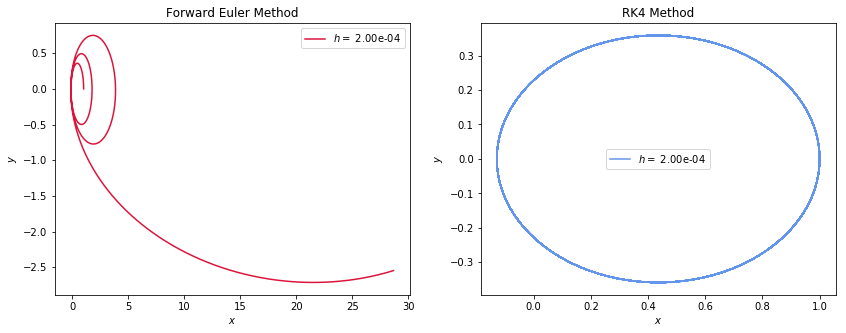

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(QE[0,:], QE[1,:], color='crimson', label=f'$h=$ {h:.2e}')
ax[0].set_title('Forward Euler Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(QR[0,:], QR[1,:], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[1].set_title('RK4 Method')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].legend()
plt.show()

It is clear that, while the RK4 has a good behavior, the forward Euler's method is unstable with the chosen parameters. With a smaller value of the stepsize, the behavior of the Euler's method solution is improved,

In [ ]:
# Creation of the time grid (in years)
t_0 = 0.
t_f = 5.

# Number of steps in the grid (1 millon points!)
nI = 1000000

# Constant stepsize defined by the number of steps in the grid
hI = (t_f - t_0)/nI

# Arrays to store the solution
tI = np.linspace(t_0, t_f, nI) # Time information
QEI = np.zeros([4,nI]) # Euler's Method information

# Initial Conditions
QEI[0,0] = 1.
QEI[1,0] = 0.
QEI[2,0] = 0.
QEI[3,0] = 3.
             
# Main loops for solving the problem
for i in range(1,nI):
    q0 = QEI[:,i-1]
    qf = FEuler(hI, 0, q0)
    QEI[:,i] = qf[:]


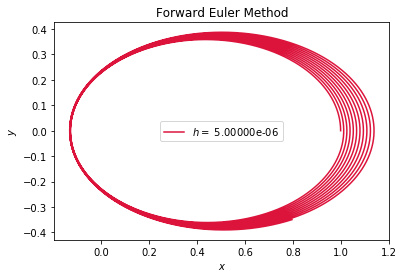

In [ ]:
fig, ax = plt.subplots()
ax.plot(QEI[0,:], QEI[1,:], color='crimson', label=f'$h=$ {hI:.5e}')
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

---

The bad behavior for the forward Euler's method can be appreciated by calculating the conserved quantities of the problem (in this case energy and angular momentum). A plot is useful to show this behavior:

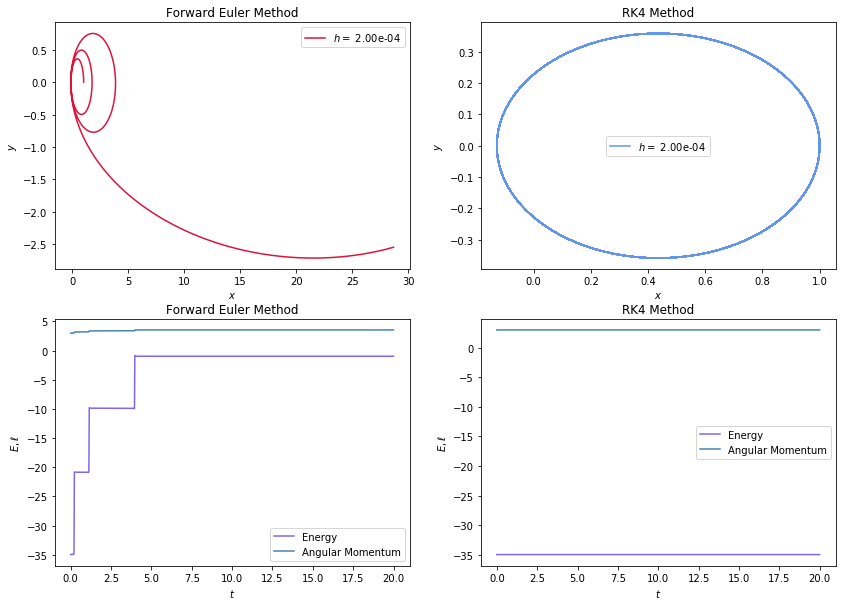

In [ ]:
EnergyE = np.zeros(n)
AngMomE = np.zeros(n)

EnergyR = np.zeros(n)
AngMomR = np.zeros(n)

for i in range(n):
    speed2 = QE[2,i]**2 + QE[3,i]**2
    r = np.sqrt(QE[0,i]**2 + QE[1,i]**2)
    EnergyE[i] = speed2/2 - G*M/r
    AngMomE[i] = QE[0,i]*QE[3,i] - QE[1,i]*QE[2,i]

for i in range(n):
    speed2 = QR[2,i]**2 + QR[3,i]**2
    r = np.sqrt(QR[0,i]**2 + QR[1,i]**2)
    EnergyR[i] = speed2/2 - G*M/r
    AngMomR[i] = QR[0,i]*QR[3,i] - QR[1,i]*QR[2,i]


fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].plot(QE[0,:], QE[1,:], color='crimson', label=f'$h=$ {h:.2e}')
ax[0,0].set_title('Forward Euler Method')
ax[0,0].set_xlabel(r'$x$')
ax[0,0].set_ylabel(r'$y$')
ax[0,0].legend()

ax[0,1].plot(QR[0,:], QR[1,:], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0,1].set_title('RK4 Method')
ax[0,1].set_xlabel(r'$x$')
ax[0,1].set_ylabel(r'$y$')
ax[0,1].legend()

ax[1,0].plot(t, EnergyE, color='mediumslateblue', label=f'Energy')
ax[1,0].plot(t, AngMomE, color='steelblue', label=f'Angular Momentum')
ax[1,0].set_title('Forward Euler Method')
ax[1,0].set_xlabel(r'$t$')
ax[1,0].set_ylabel(r'$E, \ell$')
ax[1,0].legend()

ax[1,1].plot(t, EnergyR, color='mediumslateblue', label=f'Energy')
ax[1,1].plot(t, AngMomR, color='steelblue', label=f'Angular Momentum')
ax[1,1].set_title('RK4 Method')
ax[1,1].set_xlabel(r'$t$')
ax[1,1].set_ylabel(r'$E, \ell$')
ax[1,1].legend()

plt.show()

These plots show clearly that the forward Euler's method with a not-so-small setpsize does not satisfies the conservation of energy (and produces a small increase in the angular momentum), while the RK4 do have a very good behavior.

In [ ]:
print('The change in energy for Euler\'s method is :', np.abs(EnergyE[n-1] - EnergyE[0]))
print('\nThe change in energy for RK4 method is :', np.abs(EnergyR[n-1] - EnergyR[0]))

The change in energy for Euler's method is : 34.01224429334252

The change in energy for RK4 method is : 1.1176754846076165e-05


Now we will concentrate in the RK4 algorithm. Using a grid with $100000$ the computation time is

In [ ]:
from RK4 import *


# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
Q = np.zeros([4,n]) # RK4's Method information

# Initial Conditions
Q[0,0] = 1.
Q[1,0] = 0.
Q[2,0] = 0.
Q[3,0] = 3.

# Computation time
import time
start = time.time()

# Main loops for solving the problem
for i in range(1,n):
    q0 = Q[:,i-1]
    qf = RK4(ODE, h, 0, q0)
    Q[:,i] = qf[:]

end = time.time()
print('The elapsed time was:', end - start)

The elapsed time was: 7.008426904678345


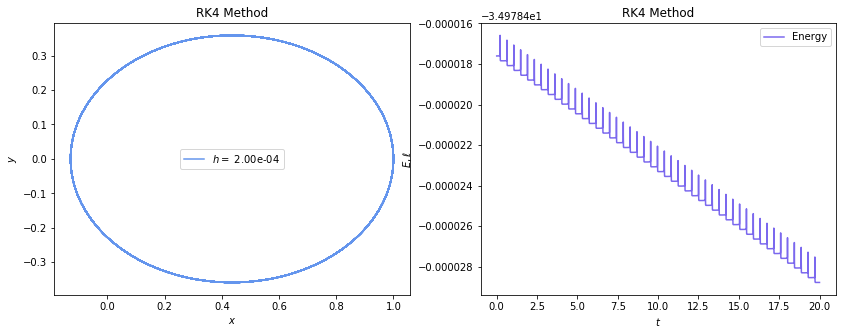

In [ ]:
Energy = np.zeros(n)
AngMom = np.zeros(n)

for i in range(n):
    speed2 = Q[2,i]**2 + Q[3,i]**2
    r = np.sqrt(Q[0,i]**2 + Q[1,i]**2)
    Energy[i] = speed2/2 - G*M/r
    AngMom[i] = Q[0,i]*Q[3,i] - Q[1,i]*Q[2,i]


fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(Q[0,:], Q[1,:], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0].set_title('RK4 Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax[1].set_title('RK4 Method')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

Note that the energy is not a constant, but shows a small continuos change that may accumulate to an important value over long intervals of time. For this time interval, the difference between final and initial values of energy is 

In [ ]:
np.abs(Energy[n-1]- Energy[0])

1.1176754846076165e-05

## Adaptative Rung-Kutta

In order to improve the solution, giving a smaller change in the energy of the system, we will implement an adaptative RK algorithm. This method will change the stepsize according to a given error tolerance. 

In [ ]:
from AdaptativeRK import *


# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Initial stepsize (we take the value used in the RK4 method above)
h = 1E-4

# Arrays to store the solution
t = np.zeros(1) # Time information
Q = np.zeros([4,1]) # RK4's Method information

# Initial Conditions
t[0] = t_0
Q[0,0] = 1.
Q[1,0] = 0.
Q[2,0] = 0.
Q[3,0] = 3.

# Computation time
import time
start = time.time()

# Counter to display the advance in calculations
Tpercentage = 0.1

# Main loops for solving the problem
i = 1
while t[len(t)-1]<t_f:
    q0 = Q[:,i-1]
    h, qf = ARK(ODE, h, 0., q0)
    Q = np.append(Q, np.reshape(qf, (4,1)), axis=1)
    t = np.append(t, t[i-1]+ h)
    if t[i]>(t_f*Tpercentage): 
        print(Tpercentage*100, '% completed')
        Tpercentage +=0.1
    i=i+1
    
end = time.time()
print('The elapsed time was:', end - start)

10.0 % completed
20.0 % completed
30.000000000000004 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
89.99999999999999 % completed
99.99999999999999 % completed
The elapsed time was: 878.3249571323395


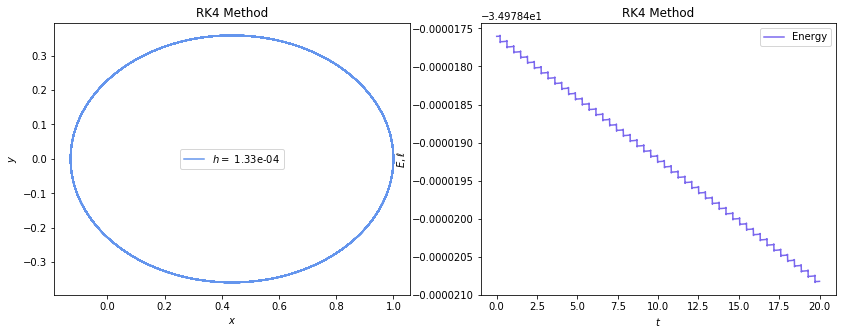

In [ ]:
n = len(t)
Energy = np.zeros(n)
AngMom = np.zeros(n)

for i in range(n):
    speed2 = Q[2,i]**2 + Q[3,i]**2
    r = np.sqrt(Q[0,i]**2 + Q[1,i]**2)
    Energy[i] = speed2/2 - G*M/r
    AngMom[i] = Q[0,i]*Q[3,i] - Q[1,i]*Q[2,i]

    
fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(Q[0,:], Q[1,:], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0].set_title('RK4 Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax[1].set_title('RK4 Method')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

In [ ]:
np.abs(Energy[n-1] - Energy[0])

3.2153850852978394e-06

Note that the conservation of energy is improved but the computation time increases considerably.

The RK4 algorithm evaluates $100000$ grid points in $5.71$ s., with change in the energy of $1.12\times 10^{-05}$.

The adaptive RK algorithm, using the error tolerance $\epsilon = 1\times 10^{-11}$ and a fudge factor $S=0.999$, evaluated $326089$ points with a variation of the energy between the initial and final values of $3.22\times 10^{-6}$. However, the computation time increased to $935.43$ s. or approximately $15.6$ minutes. 

